In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
%matplotlib inline
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [6]:
from IPython.display import Image
Image(url="cats_and_dogs.png", width=400, height=300)

Dataset contains 4,000 pictures of cats and dogs(2000 cats, 2000 dogs).

 2000 pictures will be used for training, 1000 for validation and finally 1000 for testing.

In [8]:
from IPython.display import Image
Image(url="class_img.png", width=450, height=300)

In [9]:
train_dir = r'C:\Users\user\Desktop\PYTHON MACHINE LEARNING & DEEP LEARNING\PYTHON-MACHINE-LEARNING-DEEP-LEARNING\DEEP LEARNING\CNN\train'
validation_dir = r'C:\Users\user\Desktop\PYTHON MACHINE LEARNING & DEEP LEARNING\PYTHON-MACHINE-LEARNING-DEEP-LEARNING\DEEP LEARNING\CNN\validation'
test_dir = r'C:\Users\user\Desktop\PYTHON MACHINE LEARNING & DEEP LEARNING\PYTHON-MACHINE-LEARNING-DEEP-LEARNING\DEEP LEARNING\CNN\test'

#### Data Preprocessing

1. Read the picture files.

2. Decode the JPEG content to RGB grids of pixels.

3. Convert these into floating point tensors.

4. Rescale the pixel values(between 0 and 255) to the [0, 1] interval.

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# Gena=erating batches of tensor image data

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3, 3), activation="relu",
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation="relu"))

model.add(layers.Dense(1, activation="sigmoid"))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [17]:
from tensorflow.keras import optimizers
model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=["acc"])

In [18]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,  ## training data/epochs
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50  ## validation data/epochs
    )

C:\Users\user\AppData\Local\Temp\ipykernel_33436\3414789983.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
100/100 [==============================] - 55s 530ms/step - loss: 0.6900 - acc: 0.5290 - val_loss: 0.6809 - val_acc: 0.5420
Epoch 2/20
100/100 [==============================] - 73s 736ms/step - loss: 0.6736 - acc: 0.5855 - val_loss: 0.6605 - val_acc: 0.6020
Epoch 3/20
100/100 [==============================] - 98s 963ms/step - loss: 0.6476 - acc: 0.6150 - val_loss: 0.6813 - val_acc: 0.5550
Epoch 4/20
100/100 [==============================] - 80s 801ms/step - loss: 0.6232 - acc: 0.6555 - val_loss: 0.6495 - val_acc: 0.5980
Epoch 5/20
100/100 [==============================] - 76s 758ms/step - loss: 0.5844 - acc: 0.6930 - val_loss: 0.6459 - val_acc: 0.6400
Epoch 6/20
100/100 [==============================] - 59s 593ms/step - loss: 0.5600 - acc: 0.7055 - val_loss: 0.5983 - val_acc: 0.6740
Epoch 7/20
100/100 [==============================] - 45s 453ms/step - loss: 0.5373 - acc: 0.7295 - val_loss: 0.6450 - val_acc: 0.6440
Epoch 8/20
100/100 [==============================] - 5

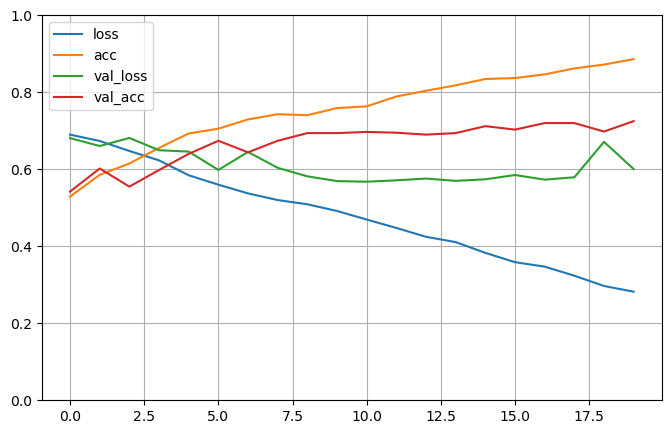

In [21]:

import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [22]:
model.save("cat_dog_model01.h5")

c:\Users\user\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
from tensorflow.keras import backend as K

K.clear_session()
del model